# Exploratory Data Analysis

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as scipy
# import matplotlib.pylib as plt
import matplotlib.pyplot as plt
import sqlite3
plt.style.use('ggplot')

## Load Data

In [150]:
cnx = sqlite3.connect('data/agri.db') # Establish connection to SQLite database file agri.db

df = pd.read_sql_query("SELECT * FROM farm_data", cnx) # Retrieve all rows and columns from farm_data table in the database and load result into Pandas dataframe df
df # Dataframe

,System Location Code,Previous Cycle Plant Type,Plant Type,Plant Stage,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm)
0,Zone_D,Herbs,Vine Crops,Maturity,23.34,NaN,454.0,937,1.82,4,161,64,201,6.1,28.150346
1,Zone_G,Herbs,VINE CROPS,Vegetative,-24.16,63.14,441.0,938,2.13,6,161,53,None,6.5,31.000000
2,Zone_F,Herbs,herbs,maturity,23.84,NaN,562.0,1246,1.21,8,228,79,292,6.4,26.000000
3,Zone_G,Herbs,fruiting vegetables,Vegetative,22.61,NaN,651.0,1346,1.96,6,None,53 ppm,289,6.6,NaN
4,Zone_B,Vine Crops,LEAFY GREENS,seedling,22.88,NaN,144.0,812,2.76,5,61,19,168,5.5,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57484,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,NaN,NaN,619.0,1074,1.95,6,150,61,210,6.4,NaN
57485,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,NaN,NaN,619.0,1074,1.95,6,150,61,210,6.4,NaN
57486,Zone_E,Herbs,VINE CROPS,Seedling,24.85,NaN,203.0,816,0.98,7,121,41,114,4.9,21.000000
57487,Zone_G,Fruiting Vegetables,VINE CROPS,Vegetative,23.45,64.89,502.0,911,2.27,5,190,57,196,5.9,35.000000


## Data Understanding

In [151]:
df.shape # Understand size of dataset

(57489, 15)

We see that the dataframe has 57489 rows and 15 columns.

In [152]:
df.columns # List out columns for easy reference

Index(['System Location Code', 'Previous Cycle Plant Type', 'Plant Type',
       'Plant Stage', 'Temperature Sensor (°C)', 'Humidity Sensor (%)',
       'Light Intensity Sensor (lux)', 'CO2 Sensor (ppm)', 'EC Sensor (dS/m)',
       'O2 Sensor (ppm)', 'Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)',
       'Nutrient K Sensor (ppm)', 'pH Sensor', 'Water Level Sensor (mm)'],
      dtype='object')

In [153]:
df.info() # List the column names and their respective data types, show if there are Null entries in each column to spot improperly formatted and missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  object 
 11  Nutrient P Sensor (ppm)       51791 non-null  object 
 12  Nutrient K Sensor (ppm)       53788 non-null  object 
 13  p

Only some columns have no Null values (thise with 57489 Non-Null Count). The rest of the columns have multiple Null vaues that we will have to replace during data cleaning later.

## Data Cleaning

In [154]:
# Some entries in the Nutrient Sensor columns have "ppm" following the integers - let's strip that
df['Nutrient N Sensor (ppm)'] = df['Nutrient N Sensor (ppm)'].str.rstrip(" ppm")
df['Nutrient P Sensor (ppm)'] = df['Nutrient P Sensor (ppm)'].str.rstrip(" ppm")
df['Nutrient K Sensor (ppm)'] = df['Nutrient K Sensor (ppm)'].str.rstrip(" ppm")
df

,System Location Code,Previous Cycle Plant Type,Plant Type,Plant Stage,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm)
0,Zone_D,Herbs,Vine Crops,Maturity,23.34,NaN,454.0,937,1.82,4,161,64,201,6.1,28.150346
1,Zone_G,Herbs,VINE CROPS,Vegetative,-24.16,63.14,441.0,938,2.13,6,161,53,None,6.5,31.000000
2,Zone_F,Herbs,herbs,maturity,23.84,NaN,562.0,1246,1.21,8,228,79,292,6.4,26.000000
3,Zone_G,Herbs,fruiting vegetables,Vegetative,22.61,NaN,651.0,1346,1.96,6,None,53,289,6.6,NaN
4,Zone_B,Vine Crops,LEAFY GREENS,seedling,22.88,NaN,144.0,812,2.76,5,61,19,168,5.5,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57484,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,NaN,NaN,619.0,1074,1.95,6,150,61,210,6.4,NaN
57485,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,NaN,NaN,619.0,1074,1.95,6,150,61,210,6.4,NaN
57486,Zone_E,Herbs,VINE CROPS,Seedling,24.85,NaN,203.0,816,0.98,7,121,41,114,4.9,21.000000
57487,Zone_G,Fruiting Vegetables,VINE CROPS,Vegetative,23.45,64.89,502.0,911,2.27,5,190,57,196,5.9,35.000000


In [155]:
df["System Location Code"].value_counts() # Check unique values to identify any inconsistencies or anomalies in System Location Code - all good here

System Location Code
Zone_B    8296
Zone_G    8287
Zone_E    8272
Zone_C    8268
Zone_F    8156
Zone_A    8148
Zone_D    8062
Name: count, dtype: int64

In [156]:
df["Previous Cycle Plant Type"].value_counts() # Check unique values to identify any inconsistencies or anomalies in Previous Cycle Plant Type - all good here

Previous Cycle Plant Type
Fruiting Vegetables    14481
Leafy Greens           14446
Vine Crops             14305
Herbs                  14257
Name: count, dtype: int64

In [157]:
df["Plant Type"].value_counts() # Check unique values to identify any inconsistencies or anomalies in Plant Type


Plant Type
Fruiting Vegetables    10137
Herbs                  10059
Leafy Greens            9968
Vine Crops              9921
leafy greens            2241
HERBS                   2239
LEAFY GREENS            2183
VINE CROPS              2173
vine crops              2163
FRUITING VEGETABLES     2154
fruiting vegetables     2128
herbs                   2123
Name: count, dtype: int64

We can see different capitalization styles for similar categories of Plant Type. Let's clean that up and standardize all Plant Types to Title Case.

In [158]:
df["Plant Type"] = df["Plant Type"].map(str.title) # Standardize the Plant Type column by converting each value to title case
df["Plant Type"].value_counts() # Check unique values - all good now

Plant Type
Herbs                  14421
Fruiting Vegetables    14419
Leafy Greens           14392
Vine Crops             14257
Name: count, dtype: int64

In [159]:
df["Plant Stage"].value_counts() # Check unique values to identify any inconsistencies or anomalies in Plant Stage

Plant Stage
Seedling      13440
Vegetative    13364
Maturity      13330
SEEDLING       3048
seedling       2937
maturity       2899
VEGETATIVE     2889
vegetative     2809
MATURITY       2773
Name: count, dtype: int64

We can see different capitalization styles for similar categories of Plant Stage. Let's clean that up and standardize all Plant Stages to Title Case.

In [160]:
df["Plant Stage"] = df["Plant Stage"].map(str.title) # Standardize the Plant Stage column by converting each value to title case
df["Plant Stage"].value_counts() # Check unique values - all good now

Plant Stage
Seedling      19425
Vegetative    19062
Maturity      19002
Name: count, dtype: int64

In [161]:
df # Look at data frame after cleaning

,System Location Code,Previous Cycle Plant Type,Plant Type,Plant Stage,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm)
0,Zone_D,Herbs,Vine Crops,Maturity,23.34,NaN,454.0,937,1.82,4,161,64,201,6.1,28.150346
1,Zone_G,Herbs,Vine Crops,Vegetative,-24.16,63.14,441.0,938,2.13,6,161,53,None,6.5,31.000000
2,Zone_F,Herbs,Herbs,Maturity,23.84,NaN,562.0,1246,1.21,8,228,79,292,6.4,26.000000
3,Zone_G,Herbs,Fruiting Vegetables,Vegetative,22.61,NaN,651.0,1346,1.96,6,None,53,289,6.6,NaN
4,Zone_B,Vine Crops,Leafy Greens,Seedling,22.88,NaN,144.0,812,2.76,5,61,19,168,5.5,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57484,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,NaN,NaN,619.0,1074,1.95,6,150,61,210,6.4,NaN
57485,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,NaN,NaN,619.0,1074,1.95,6,150,61,210,6.4,NaN
57486,Zone_E,Herbs,Vine Crops,Seedling,24.85,NaN,203.0,816,0.98,7,121,41,114,4.9,21.000000
57487,Zone_G,Fruiting Vegetables,Vine Crops,Vegetative,23.45,64.89,502.0,911,2.27,5,190,57,196,5.9,35.000000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  object 
 11  Nutrient P Sensor (ppm)       51791 non-null  object 
 12  Nutrient K Sensor (ppm)       53788 non-null  object 
 13  p

Let's convert all numeric data to Numeric type

In [163]:
df['Temperature Sensor (°C)'] = pd.to_numeric(df['Temperature Sensor (°C)'], errors='coerce')
df['Humidity Sensor (%)'] = pd.to_numeric(df['Humidity Sensor (%)'], errors='coerce')
df['Light Intensity Sensor (lux)'] = pd.to_numeric(df['Light Intensity Sensor (lux)'], errors='coerce')
df['Nutrient N Sensor (ppm)'] = pd.to_numeric(df['Nutrient N Sensor (ppm)'], errors='coerce')
df['Nutrient P Sensor (ppm)'] = pd.to_numeric(df['Nutrient P Sensor (ppm)'], errors='coerce')
df['Nutrient K Sensor (ppm)'] = pd.to_numeric(df['Nutrient K Sensor (ppm)'], errors='coerce')
df['Water Level Sensor (mm)'] = pd.to_numeric(df['Water Level Sensor (mm)'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  float64
 11  Nutrient P Sensor (ppm)       51791 non-null  float64
 12  Nutrient K Sensor (ppm)       53788 non-null  float64
 13  p

In [164]:
df.isna().sum() # check for NaN (missing) values

System Location Code                0
Previous Cycle Plant Type           0
Plant Type                          0
Plant Stage                         0
Temperature Sensor (°C)          8689
Humidity Sensor (%)             38867
Light Intensity Sensor (lux)     4278
CO2 Sensor (ppm)                    0
EC Sensor (dS/m)                    0
O2 Sensor (ppm)                     0
Nutrient N Sensor (ppm)          9974
Nutrient P Sensor (ppm)          5698
Nutrient K Sensor (ppm)          3701
pH Sensor                           0
Water Level Sensor (mm)          8642
dtype: int64

In [165]:
df.describe() # Generate summary statistics for numerical columns in the datafame

,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm)
count,48800.000000,18622.000000,53211.000000,57489.000000,57489.000000,57489.000000,47515.000000,51791.000000,53788.000000,57489.000000,48847.000000
mean,22.138201,69.243535,397.841668,1083.376576,1.624435,6.580842,157.684205,49.858431,217.990277,6.021446,25.716878
std,7.556981,5.725973,222.923860,172.570351,0.415535,1.145534,45.700829,15.414867,60.697365,0.400251,5.815294
min,-28.570000,59.220000,-799.000000,799.000000,-0.250000,3.000000,49.000000,19.000000,99.000000,3.800000,10.001955
25%,22.140000,64.340000,257.000000,950.000000,1.360000,6.000000,124.000000,37.000000,170.000000,5.800000,21.313361
50%,23.210000,68.700000,403.000000,1071.000000,1.650000,7.000000,158.000000,50.000000,215.000000,6.000000,26.000000
75%,24.350000,74.117500,553.000000,1178.000000,1.900000,7.000000,190.000000,62.000000,266.000000,6.300000,30.000000
max,28.750000,81.140000,800.000000,1500.000000,3.440000,11.000000,250.000000,80.000000,350.000000,7.800000,39.998717


Let's substitute the Mean as a reasonable guess for the missing values

In [166]:
from sklearn.impute import SimpleImputer

# Imputing missing values with mean
imputer = SimpleImputer(strategy='mean')
df['Temperature Sensor (°C)'] = imputer.fit_transform(df[['Temperature Sensor (°C)']])
df['Humidity Sensor (%)'] = imputer.fit_transform(df[['Humidity Sensor (%)']])
df['Light Intensity Sensor (lux)'] = imputer.fit_transform(df[['Light Intensity Sensor (lux)']])
df['Nutrient N Sensor (ppm)'] = imputer.fit_transform(df[['Nutrient N Sensor (ppm)']])
df['Nutrient P Sensor (ppm)'] = imputer.fit_transform(df[['Nutrient P Sensor (ppm)']])
df['Nutrient K Sensor (ppm)'] = imputer.fit_transform(df[['Nutrient K Sensor (ppm)']])
df['Water Level Sensor (mm)'] = imputer.fit_transform(df[['Water Level Sensor (mm)']])

In [167]:
df.isna().sum() # check if there are stilo any NaN (missing) values

System Location Code            0
Previous Cycle Plant Type       0
Plant Type                      0
Plant Stage                     0
Temperature Sensor (°C)         0
Humidity Sensor (%)             0
Light Intensity Sensor (lux)    0
CO2 Sensor (ppm)                0
EC Sensor (dS/m)                0
O2 Sensor (ppm)                 0
Nutrient N Sensor (ppm)         0
Nutrient P Sensor (ppm)         0
Nutrient K Sensor (ppm)         0
pH Sensor                       0
Water Level Sensor (mm)         0
dtype: int64

Perfect, we have a filled-in dataframe now!

In [168]:
df

,System Location Code,Previous Cycle Plant Type,Plant Type,Plant Stage,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm)
0,Zone_D,Herbs,Vine Crops,Maturity,23.340000,69.243535,454.0,937,1.82,4,161.000000,64.0,201.000000,6.1,28.150346
1,Zone_G,Herbs,Vine Crops,Vegetative,-24.160000,63.140000,441.0,938,2.13,6,161.000000,53.0,217.990277,6.5,31.000000
2,Zone_F,Herbs,Herbs,Maturity,23.840000,69.243535,562.0,1246,1.21,8,228.000000,79.0,292.000000,6.4,26.000000
3,Zone_G,Herbs,Fruiting Vegetables,Vegetative,22.610000,69.243535,651.0,1346,1.96,6,157.684205,53.0,289.000000,6.6,25.716878
4,Zone_B,Vine Crops,Leafy Greens,Seedling,22.880000,69.243535,144.0,812,2.76,5,61.000000,19.0,168.000000,5.5,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57484,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,22.138201,69.243535,619.0,1074,1.95,6,150.000000,61.0,210.000000,6.4,25.716878
57485,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,22.138201,69.243535,619.0,1074,1.95,6,150.000000,61.0,210.000000,6.4,25.716878
57486,Zone_E,Herbs,Vine Crops,Seedling,24.850000,69.243535,203.0,816,0.98,7,121.000000,41.0,114.000000,4.9,21.000000
57487,Zone_G,Fruiting Vegetables,Vine Crops,Vegetative,23.450000,64.890000,502.0,911,2.27,5,190.000000,57.0,196.000000,5.9,35.000000


## Deal With Outliers

Let's do an exploratory scatterplot on the Temperature and Plant Type:

<Axes: xlabel='Plant Type', ylabel='Temperature Sensor (°C)'>

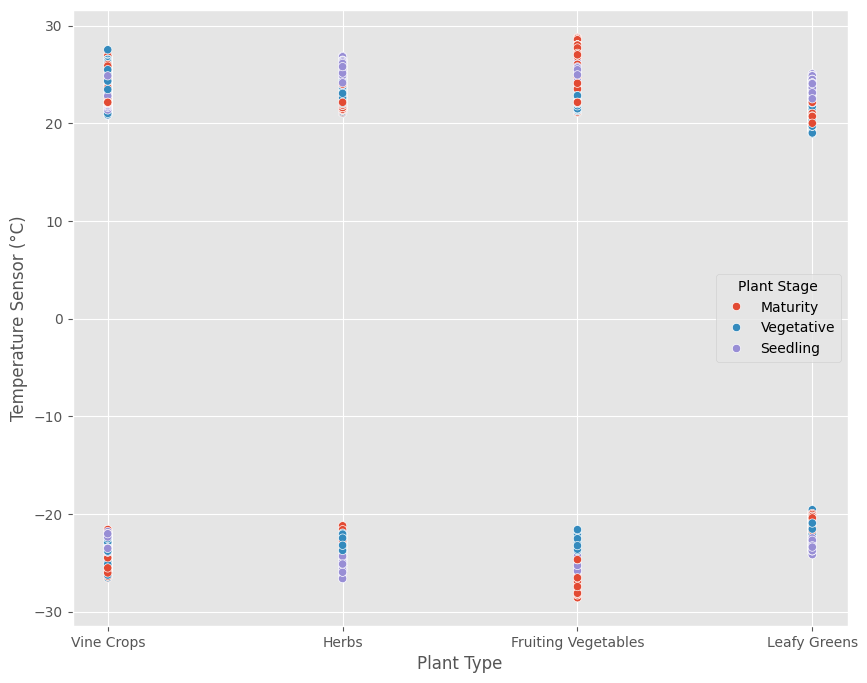

In [169]:
plt.figure(figsize=(10, 8)) 
sns.scatterplot(x='Plant Type',
                y='Temperature Sensor (°C)',
                hue='Plant Stage',
                data=df)

Negative temperatures in the range of -20°C to -30°C for plants are highly unusual, especially in a controlled farm environment where the temperature is typically optimized for plant growth. 
Most plants cannot survive such extreme negative temperatures, let alone thrive. The negative values are likely erroneous.

Let's explore the Temperature data by checking the distribution.
Let's plot the temperature data to identify patterns and anomalies:

<Axes: xlabel='Temperature Sensor (°C)', ylabel='Count'>

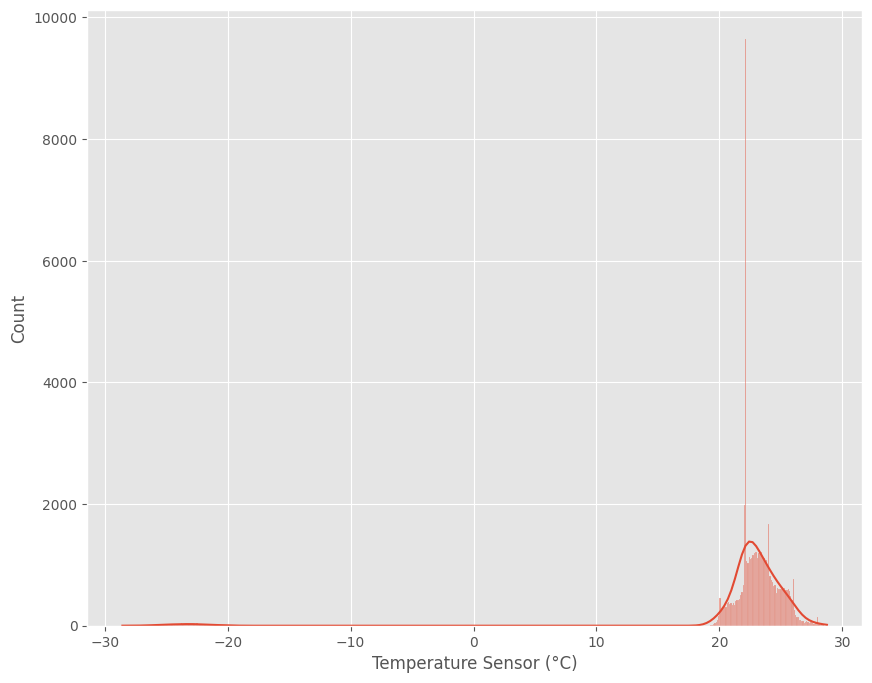

In [170]:
plt.figure(figsize=(10, 8)) 
sns.histplot(df['Temperature Sensor (°C)'], kde=True)

It seems like the negative temperatures are anomalies because they consist of only a small percentage of the data.
Since the negative temperature data all falls within the range of -20 to -30 °C, which is exactly opposite of the normal 20 to 30 °C range for plants, we assume that the negative temperature data is due to a sensor or input error and hence will flip the negative values to positive:

In [171]:
df['Temperature Sensor (°C)'] = df['Temperature Sensor (°C)'].abs() # Flip negative Temperature values to positive

## Data Visualization

<Axes: xlabel='Plant Type', ylabel='Temperature Sensor (°C)'>

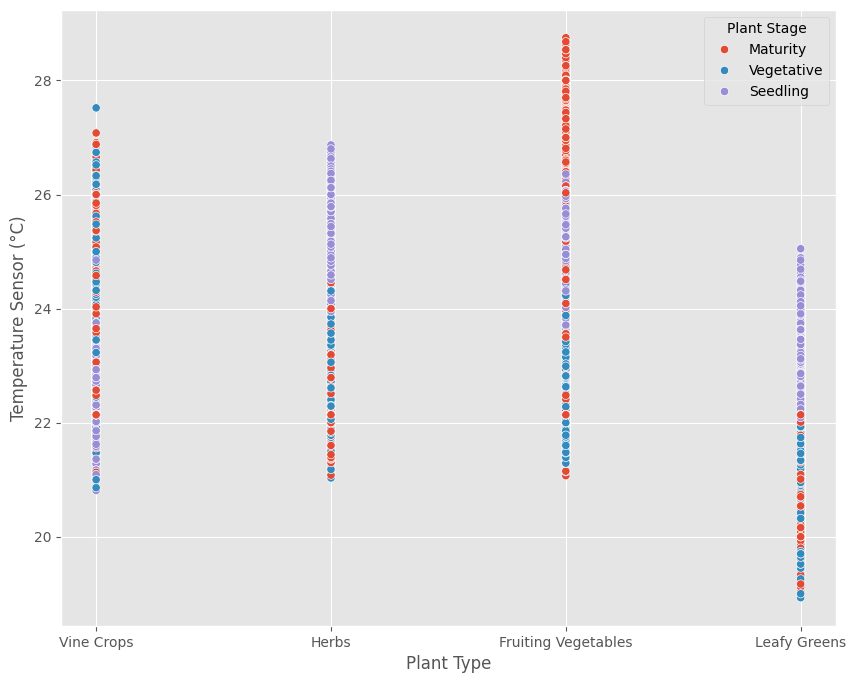

In [172]:
plt.figure(figsize=(10, 8)) 
sns.scatterplot(x='Plant Type',
                y='Temperature Sensor (°C)',
                hue='Plant Stage',
                data=df)

At one glance, we can see that the optimal temperature for:
- Seedling **Herbs** is 24-27°C 
- Seedling **Leafy Greens** is 22-25°C
- Mature **Fruiting Vegetables** is 26-29°C